# The Black-Scholes option pricing formula for European options

In [1]:
import numpy as np
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
sns.set()

**The BSM equation:**

$$
\frac{\partial V}{\partial t}+\frac{1}{2} \sigma^{2} S^{2} \frac{\partial^{2} V}{\partial S^{2}}+r S \frac{\partial V}{\partial S}-r V=0
$$

This is the partial differential equation, which governs the price of an option.

**Analytical solution of BSM equation:**

The value of a call option $c\left(S_{0}, t\right)$ can be written in the simplified was a follows
$$
c\left(S_{0}, t\right)=S_{0} N\left(d_{1}\right)-K e^{r(T-t)} N\left(d_{2}\right)
$$
with,
$$
d_{1}=\frac{\log \left(S_{0} / K\right)+\left(r+\frac{1}{2} \sigma^{2}\right)(T-t)}{\sigma \sqrt{T-t}}
$$
$$
d_{2}=\frac{\log \left(S_{0} / K\right)+\left(r-\frac{1}{2} \sigma^{2}\right)(T-t)}{\sigma \sqrt{T-t}}=d_{1}-\sigma \sqrt{T-t}
$$
and $N$ is the CDF of standard normal distribution.

In [2]:
# Auxiliary function for d_one risk-adjusted probability
def d11(S, X, T, r, sigma):
    return (np.log(S/X) + (r + 0.5 * sigma**2)*T) / (sigma * np.sqrt(T))

# Auxiliary function for d_two risk-adjusted probability    
def d21(d1, T, sigma):
    return d1 - sigma * np.sqrt(T)

### Definition of the Black-Scholes European option pricing formula

In [3]:
    
def black_scholes(S, X, T, r, sigma, option_type):
    """Price a European option using the Black-Scholes option pricing formula.
    
    Arguments:
    S           -- the current spot price of the underlying stock
    X           -- the option strike price
    T           -- the time until maturity (in fractions of a year)
    r           -- the risk-free interest rate 
    sigma       -- the returns volatility of the underlying stock
    option_type -- the option type, either 'call' or 'put'
    
    Returns: a numpy.float_ representing the option value
    """
    d_one = d11(S, X, T, r, sigma)
    d_two = d21(d_one, T, sigma)
    if option_type == 'call':
        return S * norm.cdf(d_one) - np.exp(-r * T) * X * norm.cdf(d_two)
    elif option_type == 'put':
        return -(S * norm.cdf(-d_one) - np.exp(-r * T) * X * norm.cdf(-d_two))
    else:
        # Raise an error if the option_type is neither a call nor a put
        
        raise ValueError("Option type is either 'call' or 'put'.")

### Example

<IPython.core.display.Javascript object>


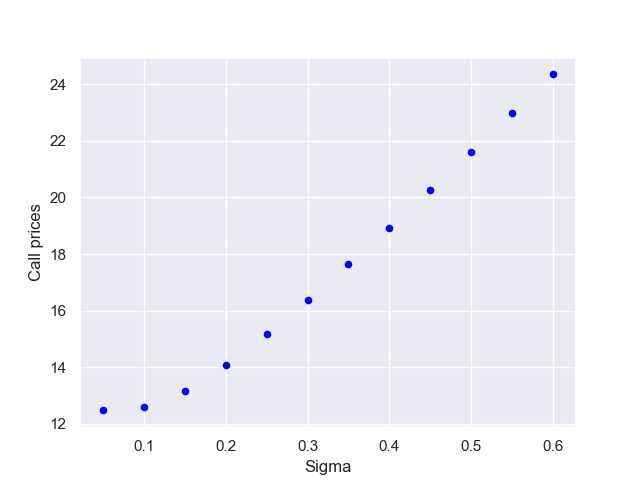

<AxesSubplot:xlabel='Sigma', ylabel='Call prices'>

In [4]:
S = 110
X = 100
r = 0.05
T = 0.5
sigma = np.arange(0.05, 0.61, 0.05)

V = black_scholes(S, X, T, r, sigma, 'call')
df = pd.DataFrame({'Sigma':sigma, 'Call prices':V })

df.plot('Sigma', 'Call prices', kind = 'scatter', color = 'blue')

<IPython.core.display.Javascript object>


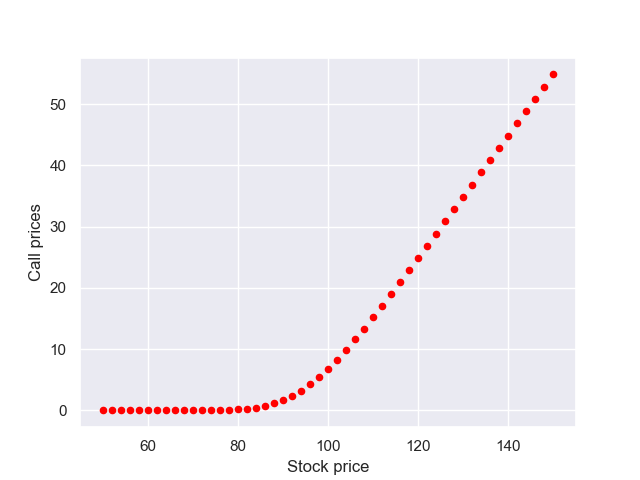

<AxesSubplot:xlabel='Stock price', ylabel='Call prices'>

In [5]:
S = np.arange(50, 151, 2)
X = 100
r = 0.05
T = 1
sigma = 0.1

V = black_scholes(S, X, T, r, sigma, 'call')
df = pd.DataFrame({'Stock price':S, 'Call prices':V })

df.plot('Stock price', 'Call prices', kind = 'scatter', color = 'red')

<IPython.core.display.Javascript object>


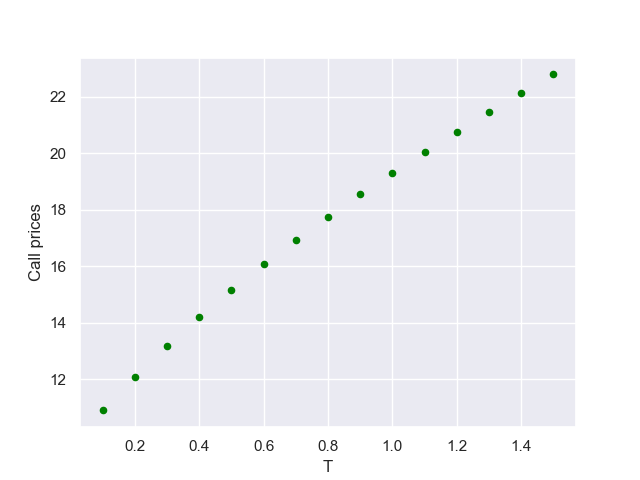

<AxesSubplot:xlabel='T', ylabel='Call prices'>

In [6]:
S = 110
X = 100
r = 0.05
T = np.arange(0.1, 1.6, 0.1)
sigma = 0.25

V = black_scholes(S, X, T, r, sigma, 'call')
df = pd.DataFrame({'T':T, 'Call prices':V })

df.plot('T', 'Call prices', kind = 'scatter', color = 'green')

## The Greeks

### Delta - Sensitivity of Option price w.r.t change in stock price (S)

* Call :

\begin{equation}
\frac{\partial V}{\partial S} = N\left(d_{1}\right)
\end{equation}

* Put :

\begin{equation}
\frac{\partial V}{\partial S} = -N\left(-d_{1}\right)=N\left(d_{1}\right)-1
\end{equation}

In [7]:
    
def bs_delta(S, X, T, r, sigma, option_type):

    if option_type == 'call':
        return norm.cdf(d11(S, X, T, r, sigma))
    elif option_type == 'put':
        return -norm.cdf(-d11(S, X, T, r, sigma))
    else:
        # Raise an error if the option_type is neither a call nor a put
        raise ValueError("Option type is either 'call' or 'put'.")

<IPython.core.display.Javascript object>


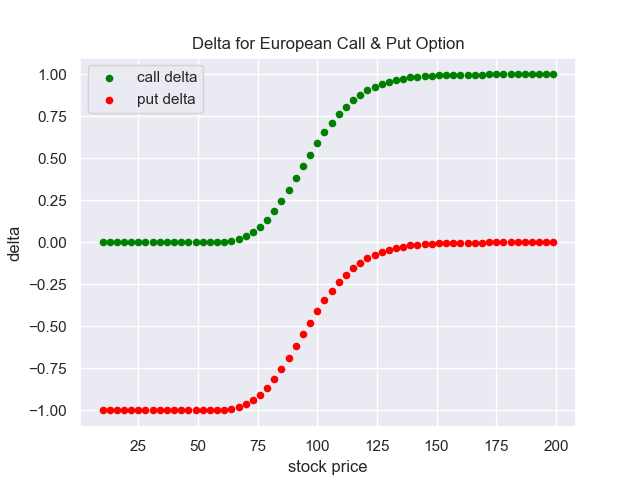

[Text(0.5, 0, 'stock price'),
 Text(0, 0.5, 'delta'),
 Text(0.5, 1.0, 'Delta for European Call & Put Option')]

In [8]:
S = np.arange(10, 200, 3)
X = 100
r = 0.05
T = 0.5
sigma = 0.25

delta_call = bs_delta(S, X, T, r, sigma, 'call')
delta_put = bs_delta(S, X, T, r, sigma, 'put')

df = pd.DataFrame({'S':S, 'delta_call':delta_call, 'delta_put':delta_put })
#print(df)



ax = df.plot('S', 'delta_call', kind = 'scatter', color = 'green', label = 'call delta')
df.plot('S', 'delta_put', kind = 'scatter', color = 'red', label = 'put delta', ax=ax)
ax.set(xlabel = 'stock price', ylabel = 'delta', title = 'Delta for European Call & Put Option')

<IPython.core.display.Javascript object>


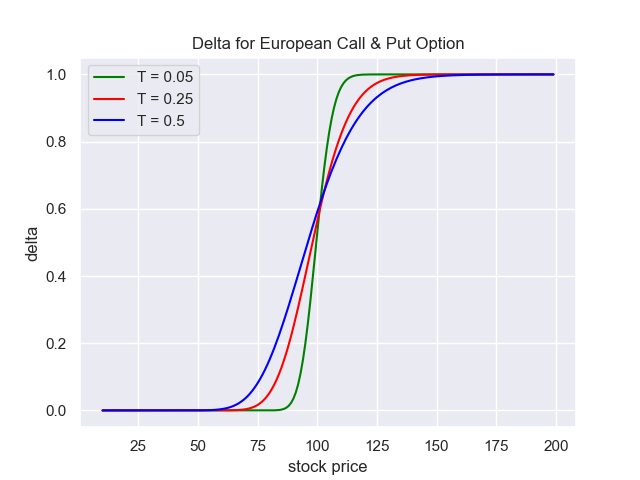

[Text(0.5, 0, 'stock price'),
 Text(0, 0.5, 'delta'),
 Text(0.5, 1.0, 'Delta for European Call & Put Option')]

In [9]:
S = np.arange(10, 200, 1)
X = 100
r = 0.05
T = np.array([0.05, 0.25, 0.5])
sigma = 0.25

delta_call_t1 = bs_delta(S, X, T[0], r, sigma, 'call')
delta_call_t2 = bs_delta(S, X, T[1], r, sigma, 'call')
delta_call_t3 = bs_delta(S, X, T[2], r, sigma, 'call')

df = pd.DataFrame({'S':S, 'T1':delta_call_t1, 'T2':delta_call_t2, 'T3':delta_call_t3})

ax = df.plot('S', 'T1', kind = 'line', color = 'green', label = 'T = 0.05')
df.plot('S', 'T2', kind = 'line', color = 'red', label = 'T = 0.25', ax=ax)
df.plot('S', 'T3', kind = 'line', color = 'blue', label = 'T = 0.5', ax=ax)
ax.set(xlabel = 'stock price', ylabel = 'delta', title = 'Delta for European Call & Put Option')

<IPython.core.display.Javascript object>


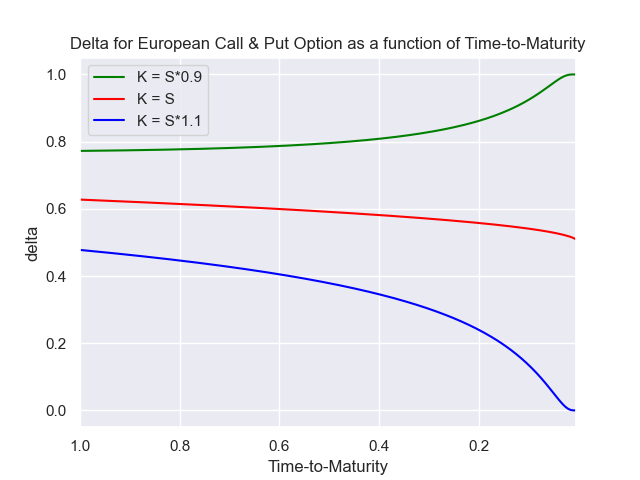

[Text(0.5, 0, 'Time-to-Maturity'),
 Text(0, 0.5, 'delta'),
 Text(0.5, 1.0, 'Delta for European Call & Put Option as a function of Time-to-Maturity')]

In [10]:
S = 110
X = [S*0.9, S, S*1.1]
r = 0.05
T = np.arange(1.0, 0, -0.005)
sigma = 0.25

delta_call_X1 = bs_delta(S, X[0], T, r, sigma, 'call')
delta_call_X2 = bs_delta(S, X[1], T, r, sigma, 'call')
delta_call_X3 = bs_delta(S, X[2], T, r, sigma, 'call')

df = pd.DataFrame({'T':T, 'X1':delta_call_X1, 'X2':delta_call_X2, 'X3':delta_call_X3})

fig, ax = plt.subplots()
ax = df.plot('T', 'X1', kind = 'line', color = 'green', label = 'K = S*0.9', ax = ax)
df.plot('T', 'X2', kind = 'line', color = 'red', label = 'K = S', ax=ax)
df.plot('T', 'X3', kind = 'line', color = 'blue', label = 'K = S*1.1', ax=ax)
ax.set_xlim(T[0], T[-1])
ax.set(xlabel = 'Time-to-Maturity', ylabel = 'delta', title = 'Delta for European Call & Put Option as a function of Time-to-Maturity')

### Gamma - Sensitivity of Delta w.r.t change in Stock price (S)

For Both Call and Put Option:

$$
\frac{\partial^{2} V}{\partial S^{2}} = 
\frac{N^{\prime}\left(d_{1}\right)}{S \sigma \sqrt{T-t}}
$$

In [11]:
def bs_gamma(S, X, T, r, sigma, option_type):
 
    if option_type == 'call':
        return norm.pdf(d11(S, X, T, r, sigma))/(S*sigma*T)
    elif option_type == 'put':
        return norm.pdf(d11(S, X, T, r, sigma))/(S*sigma*T)
    else:
        # Raise an error if the option_type is neither a call nor a put
        raise ValueError("Option type is either 'call' or 'put'.")

<IPython.core.display.Javascript object>


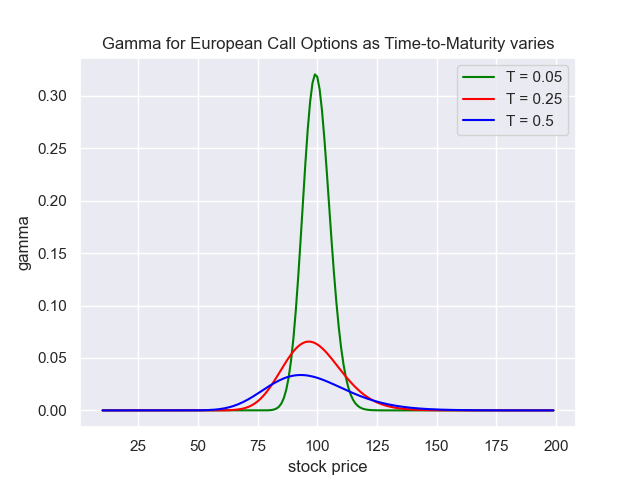

[Text(0.5, 0, 'stock price'),
 Text(0, 0.5, 'gamma'),
 Text(0.5, 1.0, 'Gamma for European Call Options as Time-to-Maturity varies')]

In [12]:
S = np.arange(10, 200, 1)
X = 100
r = 0.05
T = np.array([0.05, 0.25, 0.5])
sigma = 0.25

gamma_call_t1 = bs_gamma(S, X, T[0], r, sigma, 'call')
gamma_call_t2 = bs_gamma(S, X, T[1], r, sigma, 'call')
gamma_call_t3 = bs_gamma(S, X, T[2], r, sigma, 'call')

df = pd.DataFrame({'S':S, 'T1':gamma_call_t1, 'T2':gamma_call_t2, 'T3':gamma_call_t3})


ax = df.plot('S', 'T1', kind = 'line', color = 'green', label = 'T = 0.05')
df.plot('S', 'T2', kind = 'line', color = 'red', label = 'T = 0.25', ax=ax)
df.plot('S', 'T3', kind = 'line', color = 'blue', label = 'T = 0.5', ax=ax)
ax.set(xlabel = 'stock price', ylabel = 'gamma', title = 'Gamma for European Call Options as Time-to-Maturity varies')

<IPython.core.display.Javascript object>


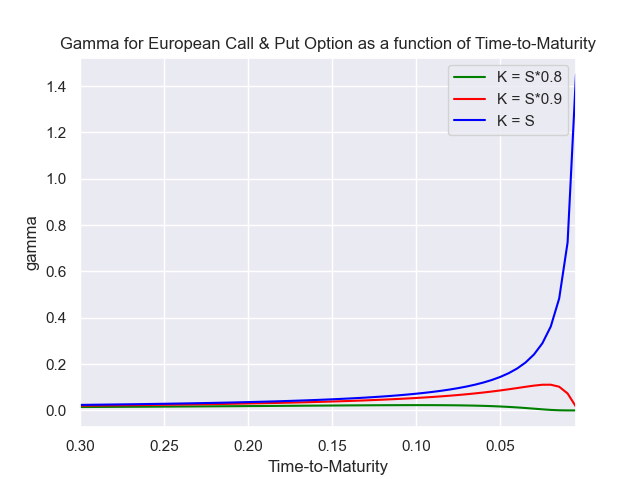

[Text(0.5, 0, 'Time-to-Maturity'),
 Text(0, 0.5, 'gamma'),
 Text(0.5, 1.0, 'Gamma for European Call & Put Option as a function of Time-to-Maturity')]

In [13]:
S = 110
X = [S*0.8, S*0.9, S]
r = 0.05
T = np.arange(0.3, 0, -0.005)
sigma = 0.5

gamma_call_X1 = bs_gamma(S, X[0], T, r, sigma, 'call')
gamma_call_X2 = bs_gamma(S, X[1], T, r, sigma, 'call')
gamma_call_X3 = bs_gamma(S, X[2], T, r, sigma, 'call')

df = pd.DataFrame({'T':T, 'X1':gamma_call_X1, 'X2':gamma_call_X2, 'X3':gamma_call_X3})

fig, ax = plt.subplots()
ax = df.plot('T', 'X1', kind = 'line', color = 'green', label = 'K = S*0.8', ax = ax)
df.plot('T', 'X2', kind = 'line', color = 'red', label = 'K = S*0.9', ax=ax)
df.plot('T', 'X3', kind = 'line', color = 'blue', label = 'K = S', ax=ax)
ax.set_xlim(T[0], T[-1])
ax.set(xlabel = 'Time-to-Maturity', ylabel = 'gamma', title = 'Gamma for European Call & Put Option as a function of Time-to-Maturity')

### Vega - Sensitivity of Option price w.r.t change in sigma (Volatility)

For Both Call and Put Option:

\begin{equation}
S N^{\prime}\left(d_{1}\right) \sqrt{T-t}
\end{equation}

In [ ]:
def bs_vega(S, X, T, r, sigma, option_type):
  
    if option_type == 'call':
        return norm.pdf(d11(S, X, T, r, sigma)) * S*T
    elif option_type == 'put':
        return norm.pdf(d11(S, X, T, r, sigma)) * S*T
    else:
        # Raise an error if the option_type is neither a call nor a put
        raise ValueError("Option type is either 'call' or 'put'.")

In [ ]:
S = np.arange(10, 200, 1)
X = 100
r = 0.05
T = np.array([0.05, 0.25, 0.5])
sigma = 0.25

vega_call_t1 = bs_vega(S, X, T[0], r, sigma, 'call')
vega_call_t2 = bs_vega(S, X, T[1], r, sigma, 'call')
vega_call_t3 = bs_vega(S, X, T[2], r, sigma, 'call')

df = pd.DataFrame({'S':S, 'T1':vega_call_t1, 'T2':vega_call_t2, 'T3':vega_call_t3})

fig, ax = plt.subplots()
ax = df.plot('S', 'T1', kind = 'line', color = 'green', label = 'T = 0.05', ax = ax)
df.plot('S', 'T2', kind = 'line', color = 'red', label = 'T = 0.25', ax=ax)
df.plot('S', 'T3', kind = 'line', color = 'blue', label = 'T = 0.5', ax=ax)
ax.set(xlabel = 'stock price', ylabel = 'vega', title = 'Vega for European Call Options as Time-to-Maturity varies')

In [ ]:
S = 110
X = [S*0.8, S*0.9, S]
r = 0.05
T = np.arange(1.0, 0, -0.005)
sigma = 0.25

vega_call_X1 = bs_vega(S, X[0], T, r, sigma, 'call')
vega_call_X2 = bs_vega(S, X[1], T, r, sigma, 'call')
vega_call_X3 = bs_vega(S, X[2], T, r, sigma, 'call')

df = pd.DataFrame({'T':T, 'X1':vega_call_X1, 'X2':vega_call_X2, 'X3':vega_call_X3})

fig, ax = plt.subplots()
ax = df.plot('T', 'X1', kind = 'line', color = 'green', label = 'K = S*0.8', ax = ax)
df.plot('T', 'X2', kind = 'line', color = 'red', label = 'K = S*0.9', ax=ax)
df.plot('T', 'X3', kind = 'line', color = 'blue', label = 'K = S', ax=ax)
ax.set_xlim(T[0], T[-1])
ax.set(xlabel = 'Time-to-Maturity', ylabel = 'vega', title = 'Vega for European Call & Put Option as a function of Time-to-Maturity')

### Theta - Sensitivity of Option price w.r.t change in Time-to-Maturity (T)

* Call : 
$$
-\frac{S N^{\prime}\left(d_{1}\right) \sigma}{2 \sqrt{T-t}}-r K e^{-r(T-t)} N\left(d_{2}\right)
$$

* Put : 
$$
\frac{S N^{\prime}\left(d_{1}\right) \sigma}{2 \sqrt{T-t}}+r K e^{-r(T-t)} N\left(-d_{2}\right)
$$

In [ ]:
def bs_theta(S, X, T, r, sigma, option_type):
  
    if option_type == 'call':
        return -norm.pdf(d11(S, X, T, r, sigma)) * S*sigma/(2*np.sqrt(T)) - r*X*np.exp(-r*T*norm.cdf(d21(d11(S, X, T, r, sigma), T, sigma)))
    elif option_type == 'put':
        return norm.pdf(d11(S, X, T, r, sigma)) * S*sigma/(2*np.sqrt(T)) + r*X*np.exp(-r*T*norm.cdf(-d21(d11(S, X, T, r, sigma), T, sigma)))
    else:
        # Raise an error if the option_type is neither a call nor a put
        raise ValueError("Option type is either 'call' or 'put'.")

In [ ]:
S = np.arange(10,200, 1)
X = 100
r = 0.05
T = np.array([0.05, 0.25, 0.5])
sigma = 0.25

theta_call_t1 = bs_theta(S, X, T[0], r, sigma, 'call')
theta_call_t2 = bs_theta(S, X, T[1], r, sigma, 'call')
theta_call_t3 = bs_theta(S, X, T[2], r, sigma, 'call')

df = pd.DataFrame({'S':S, 'T1':theta_call_t1, 'T2':theta_call_t2, 'T3':theta_call_t3})

fig, ax = plt.subplots()
ax = df.plot('S', 'T1', kind = 'line', color = 'green', label = 'T = 0.05', ax = ax)
df.plot('S', 'T2', kind = 'line', color = 'red', label = 'T = 0.25', ax=ax)
df.plot('S', 'T3', kind = 'line', color = 'blue', label = 'T = 0.5', ax=ax)
ax.set(xlabel = 'stock price', ylabel = 'theta', title = 'Theta for European Call Options as Time-to-Maturity varies')

In [ ]:
S = 110
X = [S*0.8, S*0.9, S]
r = 0.05
T = np.arange(1.0, 0, -0.005)
sigma = 0.25

theta_call_X1 = bs_theta(S, X[0], T, r, sigma, 'call')
theta_call_X2 = bs_theta(S, X[1], T, r, sigma, 'call')
theta_call_X3 = bs_theta(S, X[2], T, r, sigma, 'call')

df = pd.DataFrame({'T':T, 'X1':theta_call_X1, 'X2':theta_call_X2, 'X3':theta_call_X3})

fig, ax = plt.subplots()
ax = df.plot('T', 'X1', kind = 'line', color = 'green', label = 'K = S*0.8', ax = ax)
df.plot('T', 'X2', kind = 'line', color = 'red', label = 'K = S*0.9', ax=ax)
df.plot('T', 'X3', kind = 'line', color = 'blue', label = 'K = S', ax=ax)
ax.set_xlim(T[0], T[-1])
ax.set(xlabel = 'Time-to-Maturity', ylabel = 'theta', title = 'Theta for European Call & Put Option as a function of Time-to-Maturity')